In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
data_path = "/workspace/data/atharvasoundankar/chocolate-sales/Chocolate Sales.csv"
df = pd.read_csv(data_path)
df.head()

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,04-Jan-22,"$5,320",180
1,Van Tuxwell,India,85% Dark Bars,01-Aug-22,"$7,896",94
2,Gigi Bohling,India,Peanut Butter Cubes,07-Jul-22,"$4,501",91
3,Jan Morforth,Australia,Peanut Butter Cubes,27-Apr-22,"$12,726",342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,24-Feb-22,"$13,685",184


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Sales Person   1094 non-null   object
 1   Country        1094 non-null   object
 2   Product        1094 non-null   object
 3   Date           1094 non-null   object
 4   Amount         1094 non-null   object
 5   Boxes Shipped  1094 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 51.4+ KB


In [4]:
df.describe()

,Boxes Shipped
count,1094.000000
mean,161.797989
std,121.544145
min,1.000000
25%,70.000000
50%,135.000000
75%,228.750000
max,709.000000


In [5]:
df["Amount"] = df["Amount"].str.replace('$','').str.replace(',','').astype(float)

In [6]:
df.describe()

,Amount,Boxes Shipped
count,1094.000000,1094.000000
mean,5652.308044,161.797989
std,4102.442014,121.544145
min,7.000000,1.000000
25%,2390.500000,70.000000
50%,4868.500000,135.000000
75%,8027.250000,228.750000
max,22050.000000,709.000000


<Axes: xlabel='Amount', ylabel='Density'>

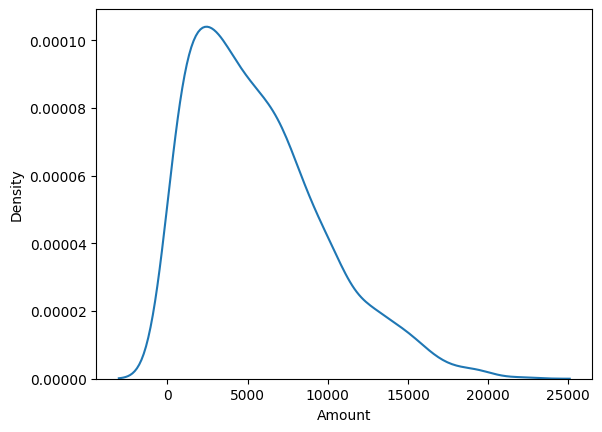

In [7]:
sns.kdeplot(data=df, x="Amount")

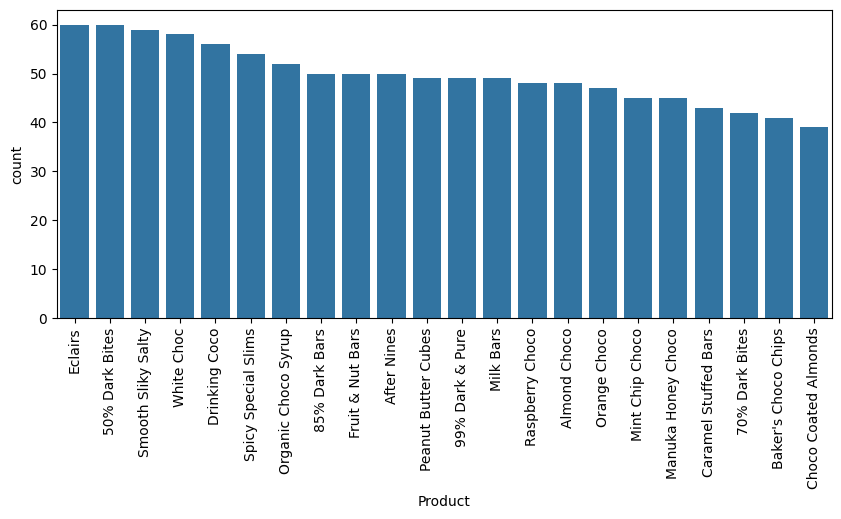

In [8]:
procduct_count = df["Product"].value_counts()

plt.figure(figsize=(10, 4))
sns.barplot(procduct_count)
plt.xticks(rotation=90)
plt.show()

In [9]:
procduct_count[procduct_count == procduct_count.min()].index[0]

'Choco Coated Almonds'

In [10]:
amt_shp_df = df.groupby("Product").sum()[["Amount", "Boxes Shipped"]]

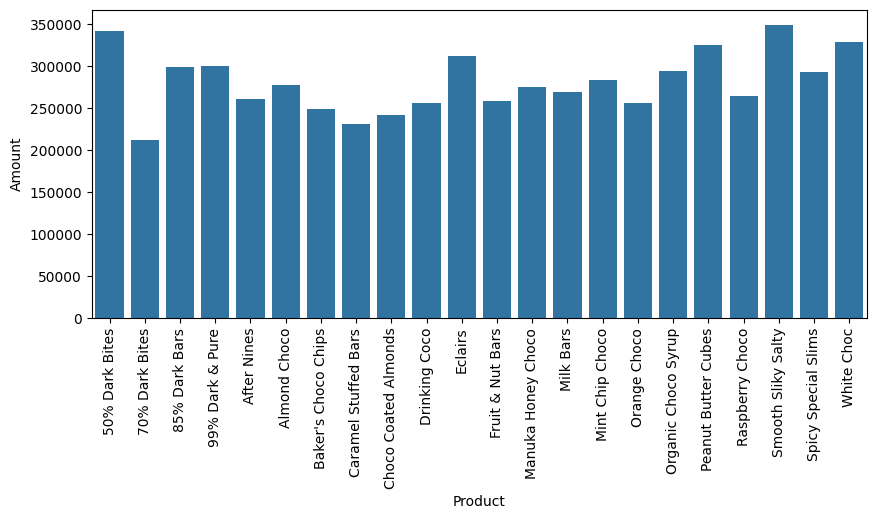

In [11]:
plt.figure(figsize=(10, 4))
sns.barplot(amt_shp_df, x=amt_shp_df.index, y="Amount")
plt.xticks(rotation=90)
plt.show()

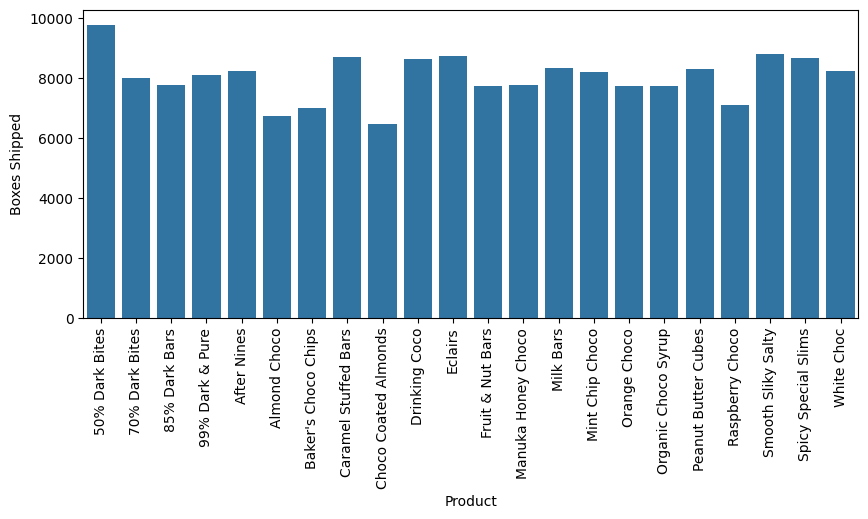

In [12]:
plt.figure(figsize=(10, 4))
sns.barplot(amt_shp_df, x=amt_shp_df.index, y="Boxes Shipped")
plt.xticks(rotation=90)
plt.show()

In [13]:
amt_shp_df["Amount per boxes shipped"] = amt_shp_df["Amount"] / amt_shp_df["Boxes Shipped"]

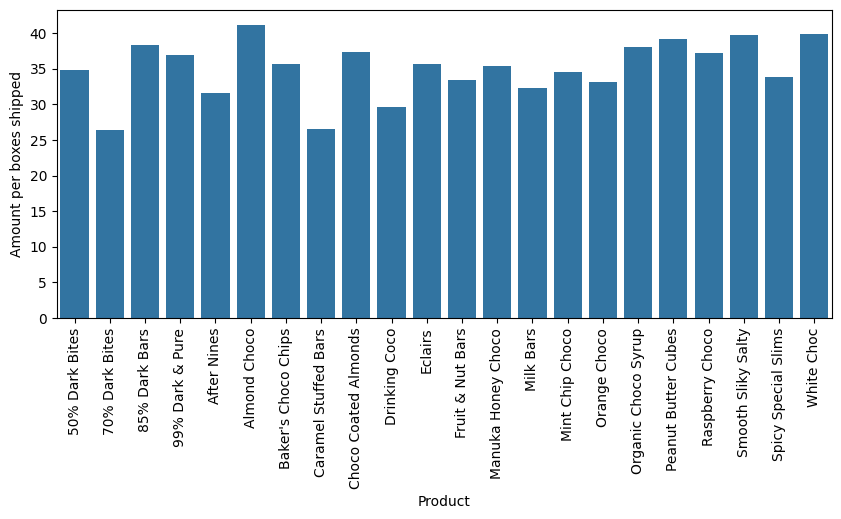

In [14]:
plt.figure(figsize=(10, 4))
sns.barplot(amt_shp_df, x=amt_shp_df.index, y="Amount per boxes shipped")
plt.xticks(rotation=90)
plt.show()

In [15]:
df.head()

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,04-Jan-22,5320.0,180
1,Van Tuxwell,India,85% Dark Bars,01-Aug-22,7896.0,94
2,Gigi Bohling,India,Peanut Butter Cubes,07-Jul-22,4501.0,91
3,Jan Morforth,Australia,Peanut Butter Cubes,27-Apr-22,12726.0,342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,24-Feb-22,13685.0,184


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sales Person   1094 non-null   object 
 1   Country        1094 non-null   object 
 2   Product        1094 non-null   object 
 3   Date           1094 non-null   object 
 4   Amount         1094 non-null   float64
 5   Boxes Shipped  1094 non-null   int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 51.4+ KB


In [17]:
df["Date"] = pd.to_datetime(df["Date"])

In [20]:
df["Day"] = df["Date"].dt.day_name()
df["Month"] = df["Date"].dt.month_name()

In [21]:
df

,Sales Person,Country,Product,Date,Amount,Boxes Shipped,Day,Month
0,Jehu Rudeforth,UK,Mint Chip Choco,2022-01-04,5320.0,180,Tuesday,January
1,Van Tuxwell,India,85% Dark Bars,2022-08-01,7896.0,94,Monday,August
2,Gigi Bohling,India,Peanut Butter Cubes,2022-07-07,4501.0,91,Thursday,July
3,Jan Morforth,Australia,Peanut Butter Cubes,2022-04-27,12726.0,342,Wednesday,April
4,Jehu Rudeforth,UK,Peanut Butter Cubes,2022-02-24,13685.0,184,Thursday,February
...,...,...,...,...,...,...,...,...
1089,Karlen McCaffrey,Australia,Spicy Special Slims,2022-05-17,4410.0,323,Tuesday,May
1090,Jehu Rudeforth,USA,White Choc,2022-06-07,6559.0,119,Tuesday,June
1091,Ches Bonnell,Canada,Organic Choco Syrup,2022-07-26,574.0,217,Tuesday,July
1092,Dotty Strutley,India,Eclairs,2022-07-28,2086.0,384,Thursday,July


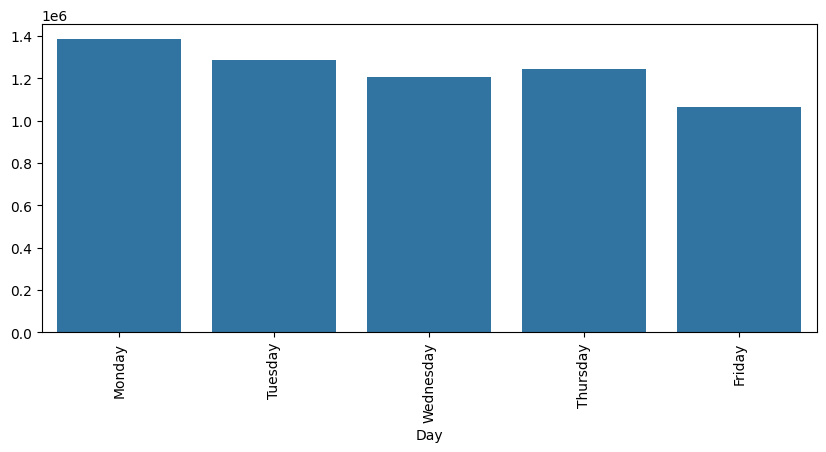

In [24]:
day_sales = df.groupby("Day")["Amount"].sum()
day_sales = day_sales.reindex(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"])

plt.figure(figsize=(10, 4))
sns.barplot( x=day_sales.index, y=day_sales.values)
plt.xticks(rotation=90)
plt.show()

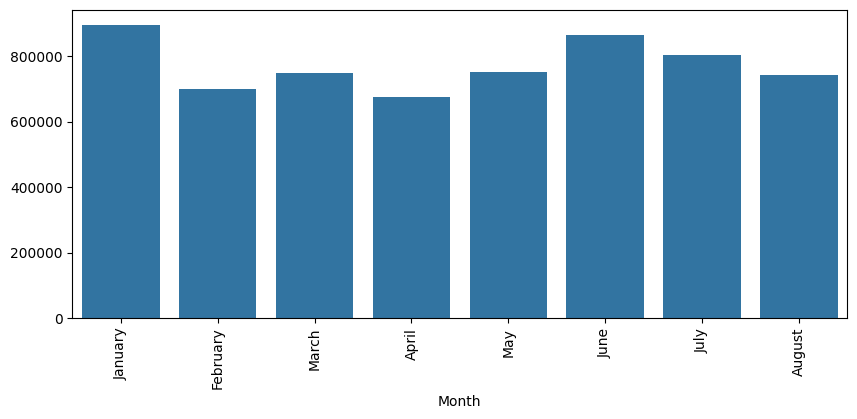

In [41]:
month_sales = df.groupby("Month")["Amount"].sum()
month_sales = month_sales.reindex(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August'])

plt.figure(figsize=(10, 4))
sns.barplot( x=month_sales.index, y=month_sales.values)
plt.xticks(rotation=90)
plt.show()

In [43]:
df["Date"].dt.year.unique()

array([2022], dtype=int32)